# 필요한 패키지 임포트

In [44]:
import os
import cv2
import numpy as np
import random
from PIL import Image

from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [45]:
## 이미지 불러와서 이미지 크기를 임의의 크기 으로 이미지 리사이즈
all_folders = os.listdir("./TrafficLightImage/")
print(all_folders)

# positive, negative
for x in all_folders:
    path = 'TrafficLightImage/' + x + '/' 
    file_list = os.listdir(path) # 폴더 하나마다 들어있는 파일들 리스트 저장

    for A in file_list:
        if A == ".DS_Store":
            continue
        img = cv2.imread(path + A)
        res = cv2.resize(img, dsize = (45, 15), interpolation = cv2.INTER_CUBIC)
        cv2.imwrite(path + A, res)

['negative', 'positive']


In [46]:
c = os.listdir("TrafficLightImage")

print(c) # 0,1 지정할 때 순서 확인

['negative', 'positive']


In [47]:
class Data():
    def __init__(self):
        
        self.train_x = []
        self.train_y = []
        self.test_x = []
        self.test_y = []
        
        self.images()
        
    def images(self):
        data = []
        classes = os.listdir("TrafficLightImage")
        
        if ".DS_Store" in classes:
            classes.remove(".DS_Store")
            
        for i, light in enumerate(classes): # negative : 0, positive : 1
            print(i, light)
            PATH = os.listdir("TrafficLightImage/" + light)
            
            if ".DS_Store" in PATH:
                PATH.remove(".DS_Store")
                
            for x in PATH:
                img = Image.open("TrafficLightImage/"+ light + "/" + x)
                data.append((np.asarray(img),i))
                img.close()
                
        random.shuffle(data)
        
        # 데이터 분할
        for i in range(len(data)):
            if i < 0.8 * len(data):
                self.train_x.append(data[i][0])
                self.train_y.append(data[i][1])
            else:
                self.test_x.append(data[i][0])
                self.test_y.append(data[i][1])
                
        self.train_x = (np.asarray(self.train_x) - np.min(self.train_x, axis = 0)) / (np.max(self.train_x, axis = 0) - np.min(self.train_x, axis = 0))
        self.train_y = np.asarray(self.train_y)
        
        self.test_x = (np.asarray(self.test_x) - np.min(self.test_x, axis = 0)) / (np.max(self.test_x, axis = 0) - np.min(self.test_x, axis = 0))
        self.test_y = np.asarray(self.test_y)
        
        print("train x size : " + str(self.train_x.shape))
        print("train y size : " + str(self.train_y.shape))
        print("test x size : " + str(self.test_x.shape))
        print("test y size : " + str(self.test_y.shape))
        
    def draw_graph(history):
        train_history = history.history["loss"]
        validation_history = history.history["val_loss"]
        fig = plt.figure(figsize = (8, 8))
        plt.title("Loss History")
        plt.xlabel("EPOCH")
        plt.ylabel("LOSS Function")
        plt.plot(train_history, "red")
        plt.plot(validation_history, 'blue')
        # fig.savefig("train_history.png")

        train_history = history.history["accuracy"]
        validation_history = history.history["val_accuracy"]
        fig = plt.figure(figsize = (8, 8))
        plt.title("Accuracy History")
        plt.xlabel("EPOCH")
        plt.ylabel("Accuracy")
        plt.plot(train_history, "red")
        plt.plot(validation_history, 'blue')
        # fig.savefig("accuracy_history.png")
        

In [48]:
A = Data()

0 negative
1 positive
train x size : (13208, 15, 45, 3)
train y size : (13208,)
test x size : (3302, 15, 45, 3)
test y size : (3302,)


In [49]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (5, 5), activation = "relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(128, activation = "relu"),
    
    keras.layers.Flatten(),
    
    # keras.layers.Dense(128, activation = "relu"),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation = "relu"),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(1, activation = "sigmoid")
])

In [50]:
model.compile(optimizer = 'adam',
              metrics = ["accuracy"], 
              loss = "binary_crossentropy")

In [51]:
Epochs = 20

In [52]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [53]:
history = model.fit(A.train_x, A.train_y, 
                    epochs = Epochs,
                    batch_size = 128,
                    validation_data = (A.test_x, A.test_y),
                    callbacks = [early_stop]
                    )

Epoch 1/20
104/104 [==============================] - 3s 23ms/step - loss: 0.4551 - accuracy: 0.7798 - val_loss: 0.1623 - val_accuracy: 0.9546
Epoch 2/20
104/104 [==============================] - 2s 21ms/step - loss: 0.1362 - accuracy: 0.9565 - val_loss: 0.0562 - val_accuracy: 0.9830
Epoch 3/20
104/104 [==============================] - 2s 21ms/step - loss: 0.0832 - accuracy: 0.9741 - val_loss: 0.0728 - val_accuracy: 0.9776
Epoch 4/20
104/104 [==============================] - 2s 21ms/step - loss: 0.0695 - accuracy: 0.9792 - val_loss: 0.0452 - val_accuracy: 0.9843
Epoch 5/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0587 - accuracy: 0.9826 - val_loss: 0.0422 - val_accuracy: 0.9861
Epoch 6/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0570 - accuracy: 0.9837 - val_loss: 0.0340 - val_accuracy: 0.9885
Epoch 7/20
104/104 [==============================] - 2s 20ms/step - loss: 0.0504 - accuracy: 0.9849 - val_loss: 0.0274 - val_accuracy: 0.9903

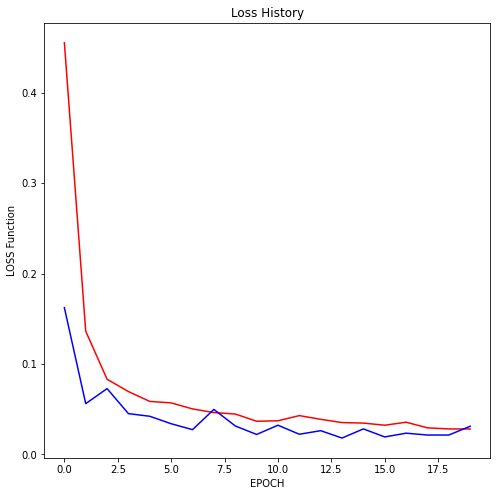

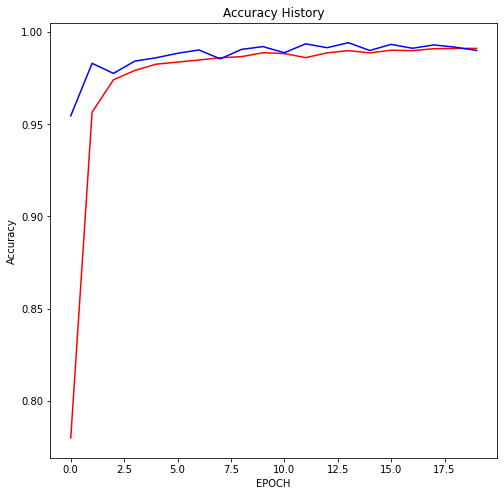

In [54]:
Data.draw_graph(history)

In [55]:
# 모델 저장
model.save("traffic_light_detection_v16.h5")   # 14, 15 괜찮음

In [56]:
# 모델 불러오기

In [57]:
model = tf.keras.models.load_model('traffic_light_detection_v16.h5')

# traffic_light_detection_v4 괜찮음

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 11, 41, 16)        1216      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 20, 16)        0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 5, 20, 16)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 18, 64)         9280      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 1, 9, 64)         

In [59]:
Path2 = 'data_2/all/'
file_list = os.listdir(Path2)

if ".DS_Store" in file_list:
    file_list.remove(".DS_Store")

data2 = []

for A in file_list:
    if A == ".DS_Store":
        continue
        
    img2 = cv2.imread(Path2 + A)
    res2 = cv2.resize(img2, dsize = (45, 15), interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(Path2 + A, res2)
    
for A in file_list:
    if A == ".DS_Store":
        continue
        
    img3 = Image.open(Path2 + A)
    data2.append(np.array(img3))
    img3.close()

In [60]:
data2 = np.asarray(data2) / 255.0

In [61]:
prediction = model.predict(data2)

In [62]:
prediction

array([[9.9198616e-01],
       [3.3301254e-05],
       [7.5474381e-01],
       [1.3834238e-04],
       [9.9427620e-05],
       [9.9999976e-01],
       [9.9039698e-01],
       [9.0753311e-01],
       [4.1941702e-03],
       [4.0110946e-04],
       [1.3768673e-04],
       [2.8467178e-04],
       [3.6507608e-05],
       [2.3302428e-05],
       [1.1635118e-05],
       [4.4065779e-05],
       [5.0324202e-04],
       [7.2194076e-01],
       [9.8360646e-01],
       [4.5413974e-01],
       [2.1141086e-06],
       [3.3480774e-06],
       [3.6257505e-04],
       [5.6324290e-05],
       [7.2625279e-03],
       [2.3638904e-03],
       [4.8127770e-04],
       [3.6627294e-05],
       [1.1244533e-06],
       [3.9711595e-04],
       [2.0670022e-05],
       [9.9986911e-01],
       [4.5301318e-03],
       [5.9868900e-05],
       [1.2778848e-02],
       [2.5969744e-04],
       [1.2760758e-03],
       [5.6827068e-04],
       [1.1303127e-03],
       [1.3801157e-03],
       [9.7444654e-04],
       [1.044303

In [63]:
light_order = {0 : "negative", 1 : "positive"}

for i, x in enumerate(prediction):
    count = 0
    
    if x >= 0.5:
        print(x)
        print(str(i) + "번째 신호등: " + file_list[i] + " : " + light_order[1])
    else:
        print(str(i) + "번째 신호등: " + file_list[i] + " : " + light_order[0])
    '''
    for y in x:
        if y > 0.90:
            count += 1
    if count > 0:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[np.argmax(x)])
    '''

[0.99198616]
0번째 신호등: 13649663_1.jpg : positive
1번째 신호등: 13668147_134.jpg : negative
[0.7547438]
2번째 신호등: 13668147_143.jpg : positive
3번째 신호등: 13668147_151.jpg : negative
4번째 신호등: 13681518_172.jpg : negative
[0.99999976]
5번째 신호등: 15430669_2.jpg : positive
[0.990397]
6번째 신호등: 15436551_1.jpg : positive
[0.9075331]
7번째 신호등: 227331.jpg : positive
8번째 신호등: 227332.jpg : negative
9번째 신호등: 227333.jpg : negative
10번째 신호등: 227334.jpg : negative
11번째 신호등: 227335.jpg : negative
12번째 신호등: 227336.jpg : negative
13번째 신호등: 227337.jpg : negative
14번째 신호등: 227338.jpg : negative
15번째 신호등: 227339.jpg : negative
16번째 신호등: 227340.jpg : negative
[0.72194076]
17번째 신호등: 2348.jpg : positive
[0.98360646]
18번째 신호등: 2349.jpg : positive
19번째 신호등: 24349.jpg : negative
20번째 신호등: 24350.jpg : negative
21번째 신호등: 24351.jpg : negative
22번째 신호등: 24352.jpg : negative
23번째 신호등: 24353.jpg : negative
24번째 신호등: 24354.jpg : negative
25번째 신호등: 24355.jpg : negative
26번째 신호등: 24356.jpg : negative
27번째 신호등: 24357.jpg : negative
28번째

# 이미지랑 같이 출력

0번째 신호등: 13649663_1.jpg : [0.99198616] positive


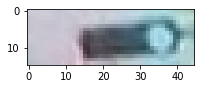

1번째 신호등: 13668147_134.jpg : [3.3301254e-05] negative


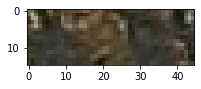

2번째 신호등: 13668147_143.jpg : [0.7547438] negative


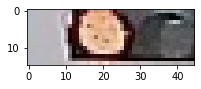

3번째 신호등: 13668147_151.jpg : [0.00013834] negative


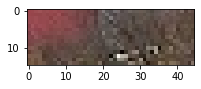

4번째 신호등: 13681518_172.jpg : [9.942762e-05] negative


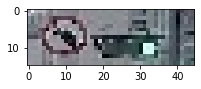

5번째 신호등: 15430669_2.jpg : [0.99999976] positive


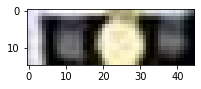

6번째 신호등: 15436551_1.jpg : [0.990397] positive


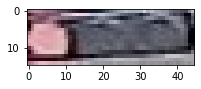

7번째 신호등: 227331.jpg : [0.9075331] positive


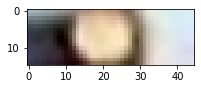

8번째 신호등: 227332.jpg : [0.00419417] negative


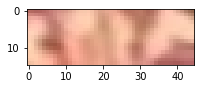

9번째 신호등: 227333.jpg : [0.00040111] negative


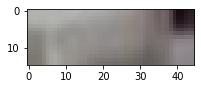

10번째 신호등: 227334.jpg : [0.00013769] negative


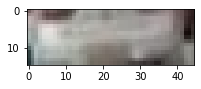

11번째 신호등: 227335.jpg : [0.00028467] negative


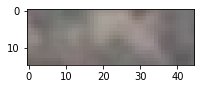

12번째 신호등: 227336.jpg : [3.650761e-05] negative


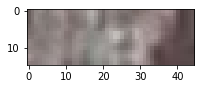

13번째 신호등: 227337.jpg : [2.3302428e-05] negative


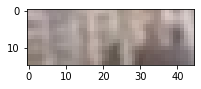

14번째 신호등: 227338.jpg : [1.1635118e-05] negative


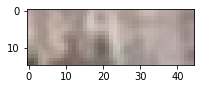

15번째 신호등: 227339.jpg : [4.406578e-05] negative


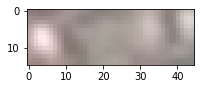

16번째 신호등: 227340.jpg : [0.00050324] negative


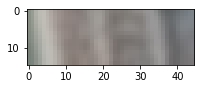

17번째 신호등: 2348.jpg : [0.72194076] negative


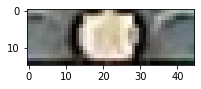

18번째 신호등: 2349.jpg : [0.98360646] positive


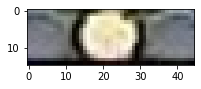

19번째 신호등: 24349.jpg : [0.45413974] negative


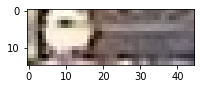

20번째 신호등: 24350.jpg : [2.1141086e-06] negative


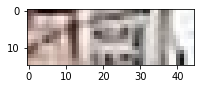

21번째 신호등: 24351.jpg : [3.3480774e-06] negative


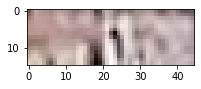

22번째 신호등: 24352.jpg : [0.00036258] negative


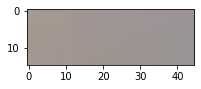

23번째 신호등: 24353.jpg : [5.632429e-05] negative


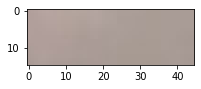

24번째 신호등: 24354.jpg : [0.00726253] negative


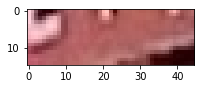

25번째 신호등: 24355.jpg : [0.00236389] negative


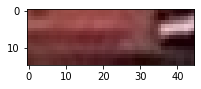

26번째 신호등: 24356.jpg : [0.00048128] negative


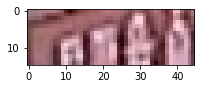

27번째 신호등: 24357.jpg : [3.6627294e-05] negative


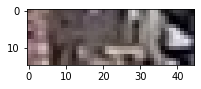

28번째 신호등: 24358.jpg : [1.1244533e-06] negative


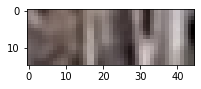

29번째 신호등: 24359.jpg : [0.00039712] negative


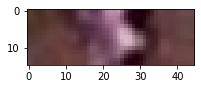

30번째 신호등: 79464.jpg : [2.0670022e-05] negative


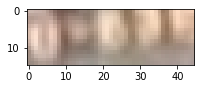

31번째 신호등: 79465.jpg : [0.9998691] positive


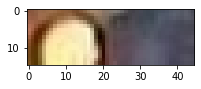

32번째 신호등: 81324.jpg : [0.00453013] negative


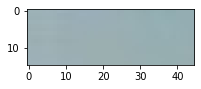

33번째 신호등: 81325.jpg : [5.98689e-05] negative


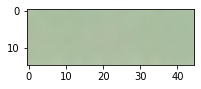

34번째 신호등: 81326.jpg : [0.01277885] negative


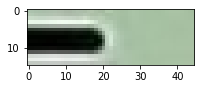

35번째 신호등: 81327.jpg : [0.0002597] negative


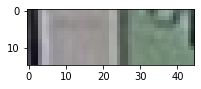

36번째 신호등: 81328.jpg : [0.00127608] negative


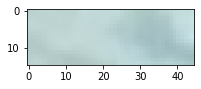

37번째 신호등: 81329.jpg : [0.00056827] negative


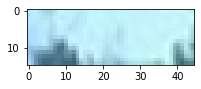

38번째 신호등: 81330.jpg : [0.00113031] negative


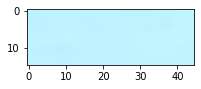

39번째 신호등: 81331.jpg : [0.00138012] negative


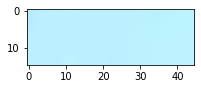

40번째 신호등: 81332.jpg : [0.00097445] negative


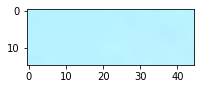

41번째 신호등: 81333.jpg : [0.0010443] negative


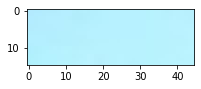

42번째 신호등: 81334.jpg : [0.00085661] negative


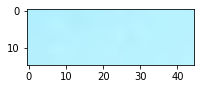

43번째 신호등: 81335.jpg : [0.00047755] negative


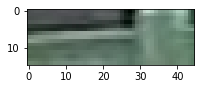

44번째 신호등: 81336.jpg : [0.03268045] negative


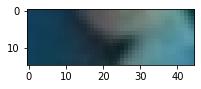

45번째 신호등: 81337.jpg : [0.00158998] negative


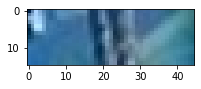

46번째 신호등: 81338.jpg : [0.9914846] positive


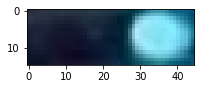

47번째 신호등: 81339.jpg : [0.00058764] negative


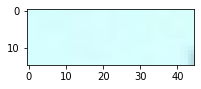

48번째 신호등: 81340.jpg : [0.9992883] positive


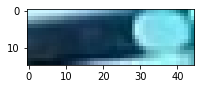

49번째 신호등: 81341.jpg : [0.99923635] positive


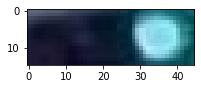

50번째 신호등: frame0_19.jpg : [0.0025008] negative


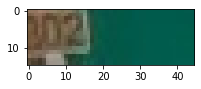

51번째 신호등: frame14_24.jpg : [0.9904797] positive


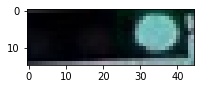

52번째 신호등: frame15_358.jpg : [0.01497278] negative


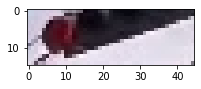

53번째 신호등: frame15_359.jpg : [0.02876547] negative


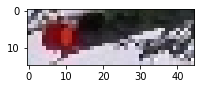

54번째 신호등: frame17_209.jpg : [0.08349389] negative


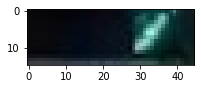

55번째 신호등: frame17_211.jpg : [0.2595371] negative


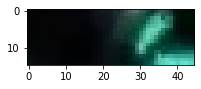

56번째 신호등: frame17_32.jpg : [0.00024605] negative


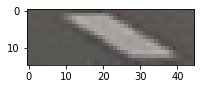

57번째 신호등: frame17_439.jpg : [0.0024882] negative


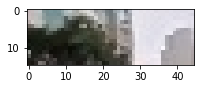

58번째 신호등: frame18_320.jpg : [0.00013244] negative


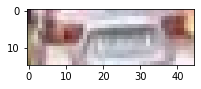

59번째 신호등: frame18_36.jpg : [0.00091678] negative


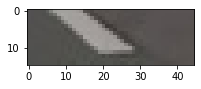

60번째 신호등: frame1_6.jpg : [0.00133663] negative


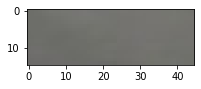

61번째 신호등: frame1_7.jpg : [0.00011407] negative


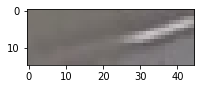

62번째 신호등: frame1_8.jpg : [0.00184709] negative


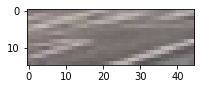

63번째 신호등: frame1_9.jpg : [0.00050578] negative


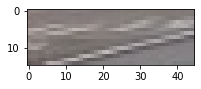

64번째 신호등: frame29_719.jpg : [0.00255629] negative


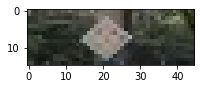

65번째 신호등: frame34_215.jpg : [0.9990642] positive


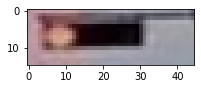

66번째 신호등: frame34_216.jpg : [0.9846192] positive


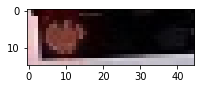

67번째 신호등: frame35_223.jpg : [4.22807e-06] negative


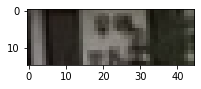

68번째 신호등: frame35_948.jpg : [0.00029522] negative


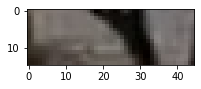

69번째 신호등: frame35_953.jpg : [0.0001395] negative


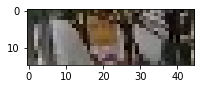

70번째 신호등: frame3_149.jpg : [0.00094858] negative


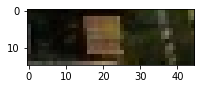

71번째 신호등: frame3_150.jpg : [0.00302538] negative


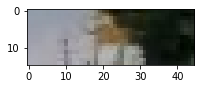

72번째 신호등: frame52_441.jpg : [0.00014716] negative


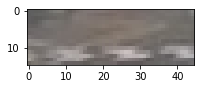

73번째 신호등: frame52_442.jpg : [0.00062478] negative


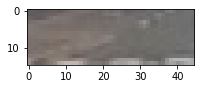

74번째 신호등: frame54_477.jpg : [0.00212514] negative


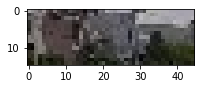

75번째 신호등: frame54_478.jpg : [0.584605] negative


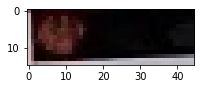

76번째 신호등: frame56_495.jpg : [6.6079288e-06] negative


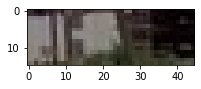

77번째 신호등: frame57_510.jpg : [4.5621415e-05] negative


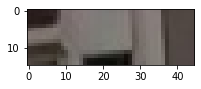

78번째 신호등: frame66_1982.jpg : [0.00011322] negative


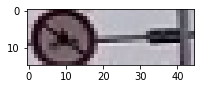

79번째 신호등: frame67_1989.jpg : [0.01788676] negative


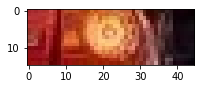

80번째 신호등: frame6_526.jpg : [4.681799e-05] negative


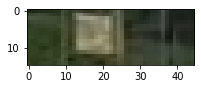

81번째 신호등: frame9_670.jpg : [0.00160137] negative


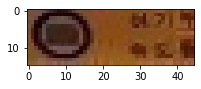

In [64]:
light_order = {0 : "negative", 1 : "positive"}

for i, x in enumerate(prediction):
    count = 0
    
    if x >= 0.85:
        print(str(i) + "번째 신호등: " + file_list[i] + " : " + str(x) + " " + light_order[1])
    else:
        print(str(i) + "번째 신호등: " + file_list[i] + " : " + str(x) + " " + light_order[0])
    
    '''
    for y in x:
        print(y)
        if y > 0.90:
            count += 1
        
    if count > 0:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[np.argmax(x)])
    else:
        print("Unknown")
    '''
      
    tstImg = cv2.imread(Path2 + file_list[i])
    tstImg = cv2.cvtColor(tstImg, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (3, 2))
    plt.imshow(tstImg)
    plt.show()
    print("=================================================")